Questions:

    Which brands are stronger and which are weaker at driving repeat purchases
    Does the marketing channel used to acquire customers make a difference
    Are there specific products which are associated with repeat purchases
    Other insight
    What would be your recommendations around Brand, Product, Marketing to improve repeat purchases

In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%cd '/Users/Jincen/Desktop/Proj/petfood'

/Users/Jincen/Desktop/Proj/petfood


In [3]:
df=pd.read_csv('sales-data.csv')
df.head()

,Customer,Date Shipped,Product ID,Brand,Channel
0,8711264,1/3/18,677,White Whale,Partner
1,8711416,1/3/18,677,White Whale,Direct
2,8711424,1/3/18,494,Black Dog,Direct
3,8712968,1/3/18,677,White Whale,Direct
4,8714688,1/3/18,677,White Whale,Direct


## 1. Brand Comparision

In [4]:
# Add Counts column showing number of purchases for each customer.
z=df.Customer.value_counts()
df['Counts']=df['Customer'].map(z.to_dict())
df.head()

,Customer,Date Shipped,Product ID,Brand,Channel,Counts
0,8711264,1/3/18,677,White Whale,Partner,5
1,8711416,1/3/18,677,White Whale,Direct,2
2,8711424,1/3/18,494,Black Dog,Direct,2
3,8712968,1/3/18,677,White Whale,Direct,3
4,8714688,1/3/18,677,White Whale,Direct,4


In [5]:
repeat_df = df[df.Counts>1] # customer who made multiple purchases
single_df = df[df.Counts==1]# customer who only made one purchase

In [6]:
len(df.Customer.unique()) #total number of customers

4177

##### First calculate how many customers made repeat purchases

In [7]:
#calculate unique customer_id in both repeat purchases and single purchases
repeat_number = repeat_df.groupby('Brand')['Customer'].nunique().values.astype(int)
single_number = single_df.groupby('Brand')['Customer'].nunique().values.astype(int)
total = df.groupby('Brand')['Customer'].nunique().values.astype(int)

In [8]:
# Create a dataframe
data = {'Repeat Customer': repeat_number, 'Single Customer': single_number, 'Total Customer':total, 'Repeat Rate':repeat_number/total }
pd.DataFrame(data, index = ['Black Dog', 'Orange Cat', 'White Whale'])

,Repeat Customer,Single Customer,Total Customer,Repeat Rate
Black Dog,700,211,911,0.768386
Orange Cat,344,82,426,0.807512
White Whale,2290,550,2840,0.806338


From the table we can see White Whale has the most customers among the three brands and it's customer retention rate is about 80.63% which is similar to Orange Cate as 80.75%. Black Dog has moderate amount of customers in all three brands but it has the lowest percentage of customer retention rate which means White Whale and Orange Cat are the best on driving repeat purchases and Black Dog is relevant weak on that. 

##### Next calculate how many times of repeat purchases made

In [9]:
#dataframe with unique customer_id
unique_repeat = repeat_df.drop_duplicates(subset='Customer',keep='first')

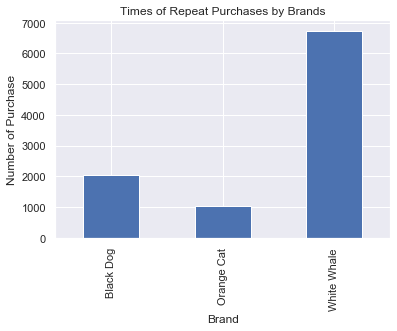

In [10]:
sns.set()
unique_repeat.groupby('Brand')['Counts'].sum().plot(kind='bar')
plt.title('Times of Repeat Purchases by Brands')
plt.xlabel('Brand')
plt.ylabel('Number of Purchase')
plt.show()

In previous table, we checked how many repeat customers each brand attracted, now the above bar plot gives the idea of how many times of total repeat purchases of each brand. It's clear that we can see White Whale has the largest number of total repeat purchases and orange cat has the lowest. 

Overall, White Whale are the strongest brand on driving repeat purchases and given Black Dog has roughly two times larger repeat purchases as Orange Cat did, Orange Cat is the weakest in all three Brands. Although Orange Cat has relevant good customer retention rate, we need to consider the base number of total purchases and total customers each brand can draw. 

## 2. Market Channel Difference on Acquiring Customers

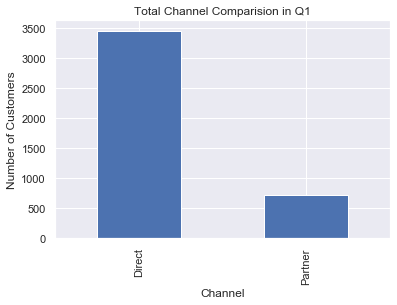

In [11]:
#Channel difference in ovrall data
df.groupby('Channel')['Customer'].nunique().plot(kind='bar')
plt.title('Total Channel Comparision in Q1')
plt.xlabel('Channel')
plt.ylabel('Number of Customers')
plt.show()

In [12]:
# Count number of unique customers in each channel grouped by brand.
df.groupby(['Brand', 'Channel'])['Customer'].nunique() 

Brand        Channel
Black Dog    Direct      684
             Partner     227
Orange Cat   Direct      426
White Whale  Direct     2346
             Partner     494
Name: Customer, dtype: int64

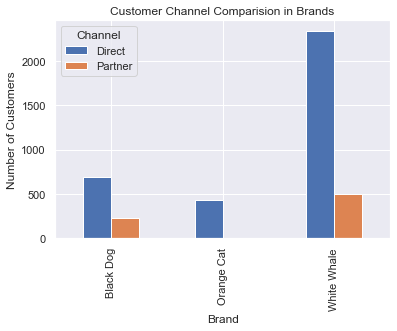

In [13]:
#Plot the above table
df.groupby(['Brand', 'Channel'])['Customer'].nunique().unstack().plot(kind='bar')
plt.title('Customer Channel Comparision in Brands')
plt.xlabel('Brand')
plt.ylabel('Number of Customers')
plt.show()

First, we checked the overall customer number difference in two channel. It gives the plot clearly showing that direct channel has a better performance. 

To check the differences between two channels precisely, we check the total number of customers each channel attracted in different brands. We see White Whale using direct channel attracted 5 times more customers compare to partner channel. Black Dog has roughly 3 times more customers in direct channel than partner channel, and Orange Cat has no customers from partner channel.

## 3. Products with Repeat Purchases

In [14]:
# number of different products of each brand
repeat_df.groupby('Brand')['Product ID'].nunique()

Brand
Black Dog      10
Orange Cat      6
White Whale     9
Name: Product ID, dtype: int64

In [15]:
# number of each product sold by brand
repeat_df.groupby('Brand')['Product ID'].value_counts(ascending=False)

Brand        Product ID
Black Dog    494            517
             470            293
             395            270
             446            245
             239            214
             1073           210
             458            126
             314             76
             284             43
             323             36
Orange Cat   1304           225
             1244           198
             1145           196
             1202           183
             1415           142
             1502            89
White Whale  377           2179
             17            1387
             548           1296
             581           1096
             1313           414
             677            156
             968             91
             1388            67
             1109            51
Name: Product ID, dtype: int64

The three distinct brands sell different products. We know that White Whale has 10 kinds, Black Dog has 6 kinds, and Orange Cat has 9 kinds of different products. Among all the repeat purchases Product ID with 377, 17, 548, 581 has over one thousand times of purchases which are the top sellers. Furthermore the top sellers are all from brand White Whale. 

In [16]:
### Other Insights: Most Popular Products for Customer

In [17]:
#Among customer only made one time purchase which product is the most popular one
single_df.groupby('Product ID')['Customer'].count().sort_values(ascending=False)

Product ID
377     492
446      83
494      58
470      58
1244     43
677      29
1304     20
968      16
1202     12
323       7
1145      7
548       6
581       5
1073      2
284       2
1313      1
395       1
17        1
Name: Customer, dtype: int64

In [18]:
#best seller in one time purchases by brands
single_df.groupby(['Brand','Product ID'])['Customer'].count().sort_values(ascending=False)

Brand        Product ID
White Whale  377           492
Black Dog    446            83
             470            58
             494            58
Orange Cat   1244           43
White Whale  677            29
Orange Cat   1304           20
White Whale  968            16
Orange Cat   1202           12
Black Dog    323             7
Orange Cat   1145            7
White Whale  548             6
             581             5
Black Dog    284             2
             1073            2
             395             1
White Whale  17              1
             1313            1
Name: Customer, dtype: int64

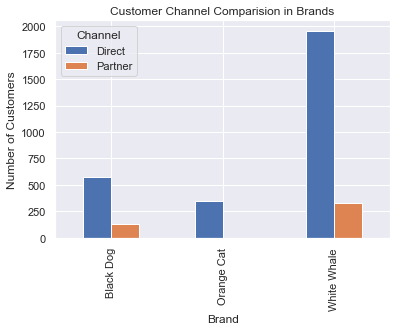

In [19]:
#channel in repeat purchases
repeat_df.groupby(['Brand', 'Channel'])['Customer'].nunique().unstack().plot(kind='bar')
plt.title('Customer Channel Comparision in Brands')
plt.xlabel('Brand')
plt.ylabel('Number of Customers')
plt.show()

## 5. Conclusion

White Whale has the largest customer base with a high customer retention rate. In order to improve repeat purchases, Petmania should focus more on the collaboration with White Whale which can enable Petmania both provide and extract more value from exising customer base. 

Direct channel is a better way to accquire customers than partner channel, Petmania should keep both channel to accquring customers since we want to keep the variation on different sources, but in the above plot in Q4 we can see that customers accquired from direct channel has higher chance for repeat purchases(ratio of blue and orange bars in repeat purchases data is larger than the ovrall purchases data in Q2) so leave more budgets to direct channel is a good solution to both accquire new customers and improve retention rate. 

At last, Product ID with 377, 17, 548, 581 are the top sellers in repeat purchase where product 377 is also the top seller in single purchase customer which means product 377 are the most popular product for new customers to give it a try and for repeat customers, product 377 is also in high demand. Petmania might want to put 377 into larger productions and promoting this product to make more loyal customers come back for it. They can also try to give the top sellers in the other two brands to White Whale to see if White Whale can optimize the profit while adding more values to the business since it has the largest customer base.